In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [82]:
shapleymtx = pd.read_pickle('shapleyNN.pkl')

In [83]:
print(shapleymtx[0].columns.tolist())

['mom1m', 'mom12m', 'chmom', 'indmom', 'mom36m', 'turn', 'mvel1', 'dolvol', 'ill', 'zerotrade', 'baspread', 'retvol', 'idiovol', 'beta', 'betasq', 'ep', 'sp', 'agr', 'nincr', 'return(t-1)', 'feature: dolvol', 'feature: baspred', 'feature: sp']


In [84]:
for i in range(8):
    shapleymtx[i] = shapleymtx[i].drop(columns = ['mom1m', 'mom12m', 'chmom', 'indmom', 'mom36m', 'turn', 'mvel1', 'dolvol', 'ill', 'zerotrade', 'baspread', 'retvol', 'idiovol', 'beta', 'betasq', 'ep', 'sp', 'agr', 'nincr', 'return(t-1)'])

**separate industry samples**

In [113]:
shapley1 = list()
df = pd.DataFrame()

for i in range(8):
    df = shapleymtx[i].iloc[0:10,:]
    shapley1.append(df)

In [158]:
shapley2 = list()
df = pd.DataFrame()

for i in range(8):
    df = shapleymtx[i].iloc[10:20,:]
    shapley2.append(df)

In [147]:
shapley3 = list()
df = pd.DataFrame()

for i in range(8):
    df = shapleymtx[i].iloc[20:30,:]
    shapley3.append(df)

In [159]:
shapley4 = list()
df = pd.DataFrame()

for i in range(8):
    df = shapleymtx[i].iloc[30:40,:]
    shapley4.append(df)

In [149]:
shapley5 = list()
df = pd.DataFrame()

for i in range(8):
    df = shapleymtx[i].iloc[40:50,:]
    shapley5.append(df)

In [150]:
shapley6 = list()
df = pd.DataFrame()

for i in range(8):
    df = shapleymtx[i].iloc[50:60,:]
    shapley6.append(df)

In [151]:
shapley7 = list()
df = pd.DataFrame()

for i in range(8):
    df = shapleymtx[i].iloc[60:70,:]
    shapley7.append(df)

In [152]:
shapley8 = list()
df = pd.DataFrame()

for i in range(8):
    df = shapleymtx[i].iloc[70:80,:]
    shapley8.append(df)

In [153]:
shapley9 = list()
df = pd.DataFrame()

for i in range(8):
    df = shapleymtx[i].iloc[80:90,:]
    shapley9.append(df)

### plan
for each feature: <br>
(x-axis: time/model; y-axis: value)<br>
  for each bin(industry, color code): <br>
    dots as individual shapley values
    line graph for average over time

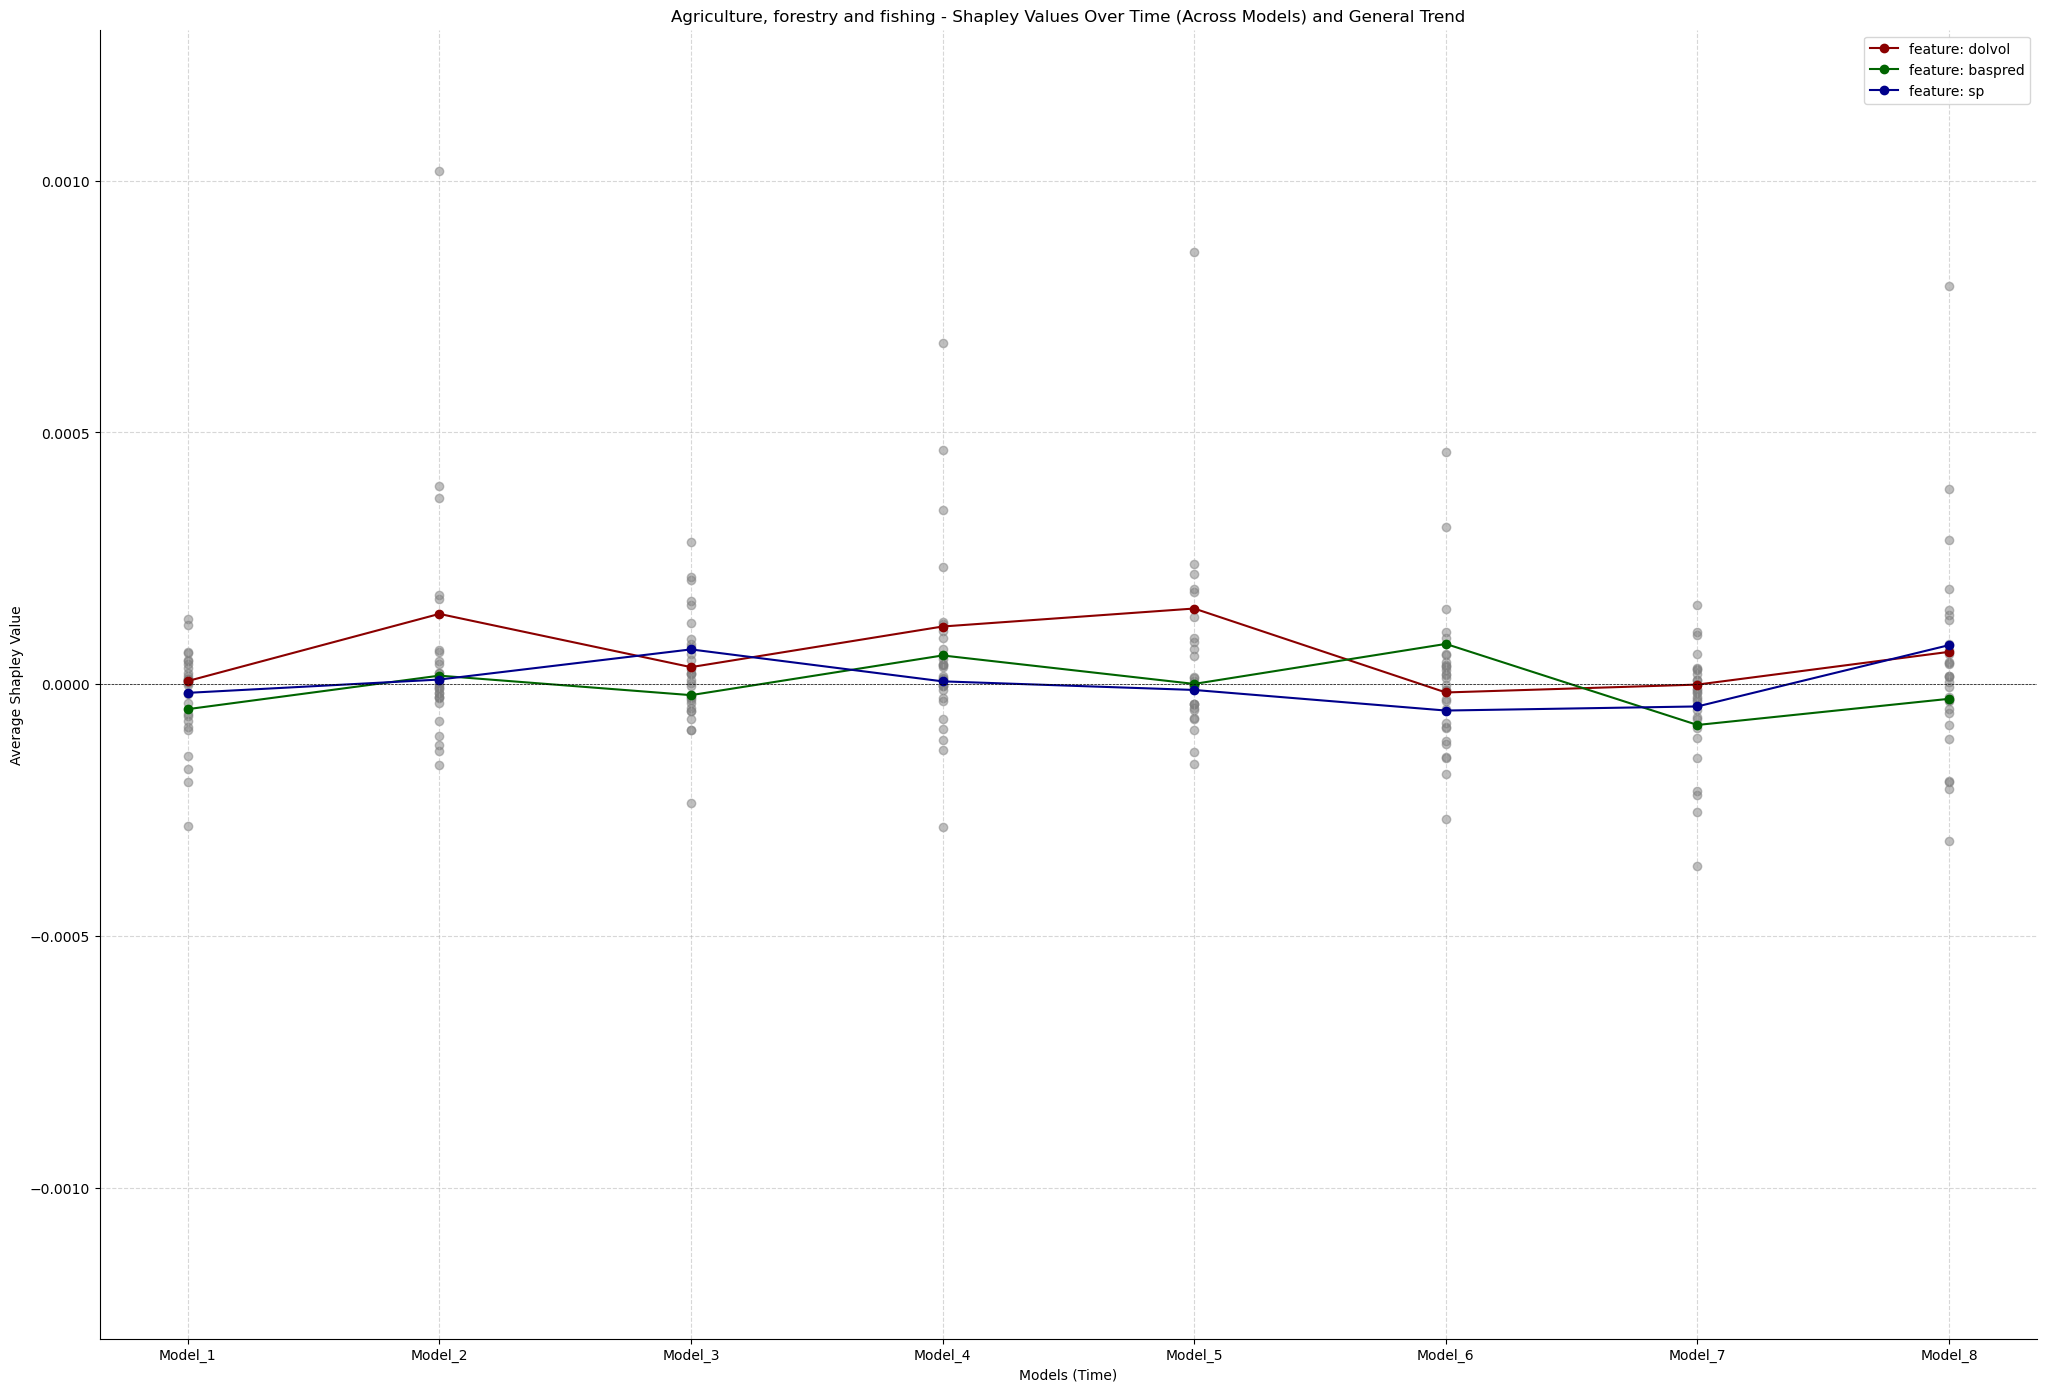

In [166]:
num_models = 8
num_samples = 10
num_features = 3
# num_inds = 9
# inds = ['Agriculture, forestry and fishing','Mining','Construction','Manufacturing',
#         'Transportation and public utilities','Wholesale trade','Retail trade','Finance, insurance and real estate',
#         'Services']

average_shap_values = []

for df in shapley1:
    shap_values = df
    features = shap_values.columns

    average_shap_values.append(shap_values.mean())   # average Shapley


plt.figure(figsize=(25, 17))

# plot individual shapley values
shap_values = np.stack([df.values for df in shapley1])
for feature_index in range(num_features):
    for model_index in range(num_models):
        plt.scatter([model_index] * 10, shap_values[model_index, :, feature_index], alpha=0.5, color='gray')


# plot average Shapley
colors = ['darkred', 'darkgreen', 'darkblue']
for i, feature in enumerate(features):
    # get the average shapley value of each feature and put them into a list
    plt.plot(range(num_models), [avg_shap[i] for avg_shap in average_shap_values], label=feature, marker='o', color = colors[i], linewidth=1.5)


plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    
plt.xlabel('Models (Time)')
plt.ylabel('Average Shapley Value')
plt.title('Agriculture, forestry and fishing - Shapley Values Over Time (Across Models) and General Trend')
plt.xticks(range(num_models), [f"Model_{i+1}" for i in range(num_models)])  # Label x-axis with model names
plt.legend()

plt.ylim(-0.0013, 0.0013)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


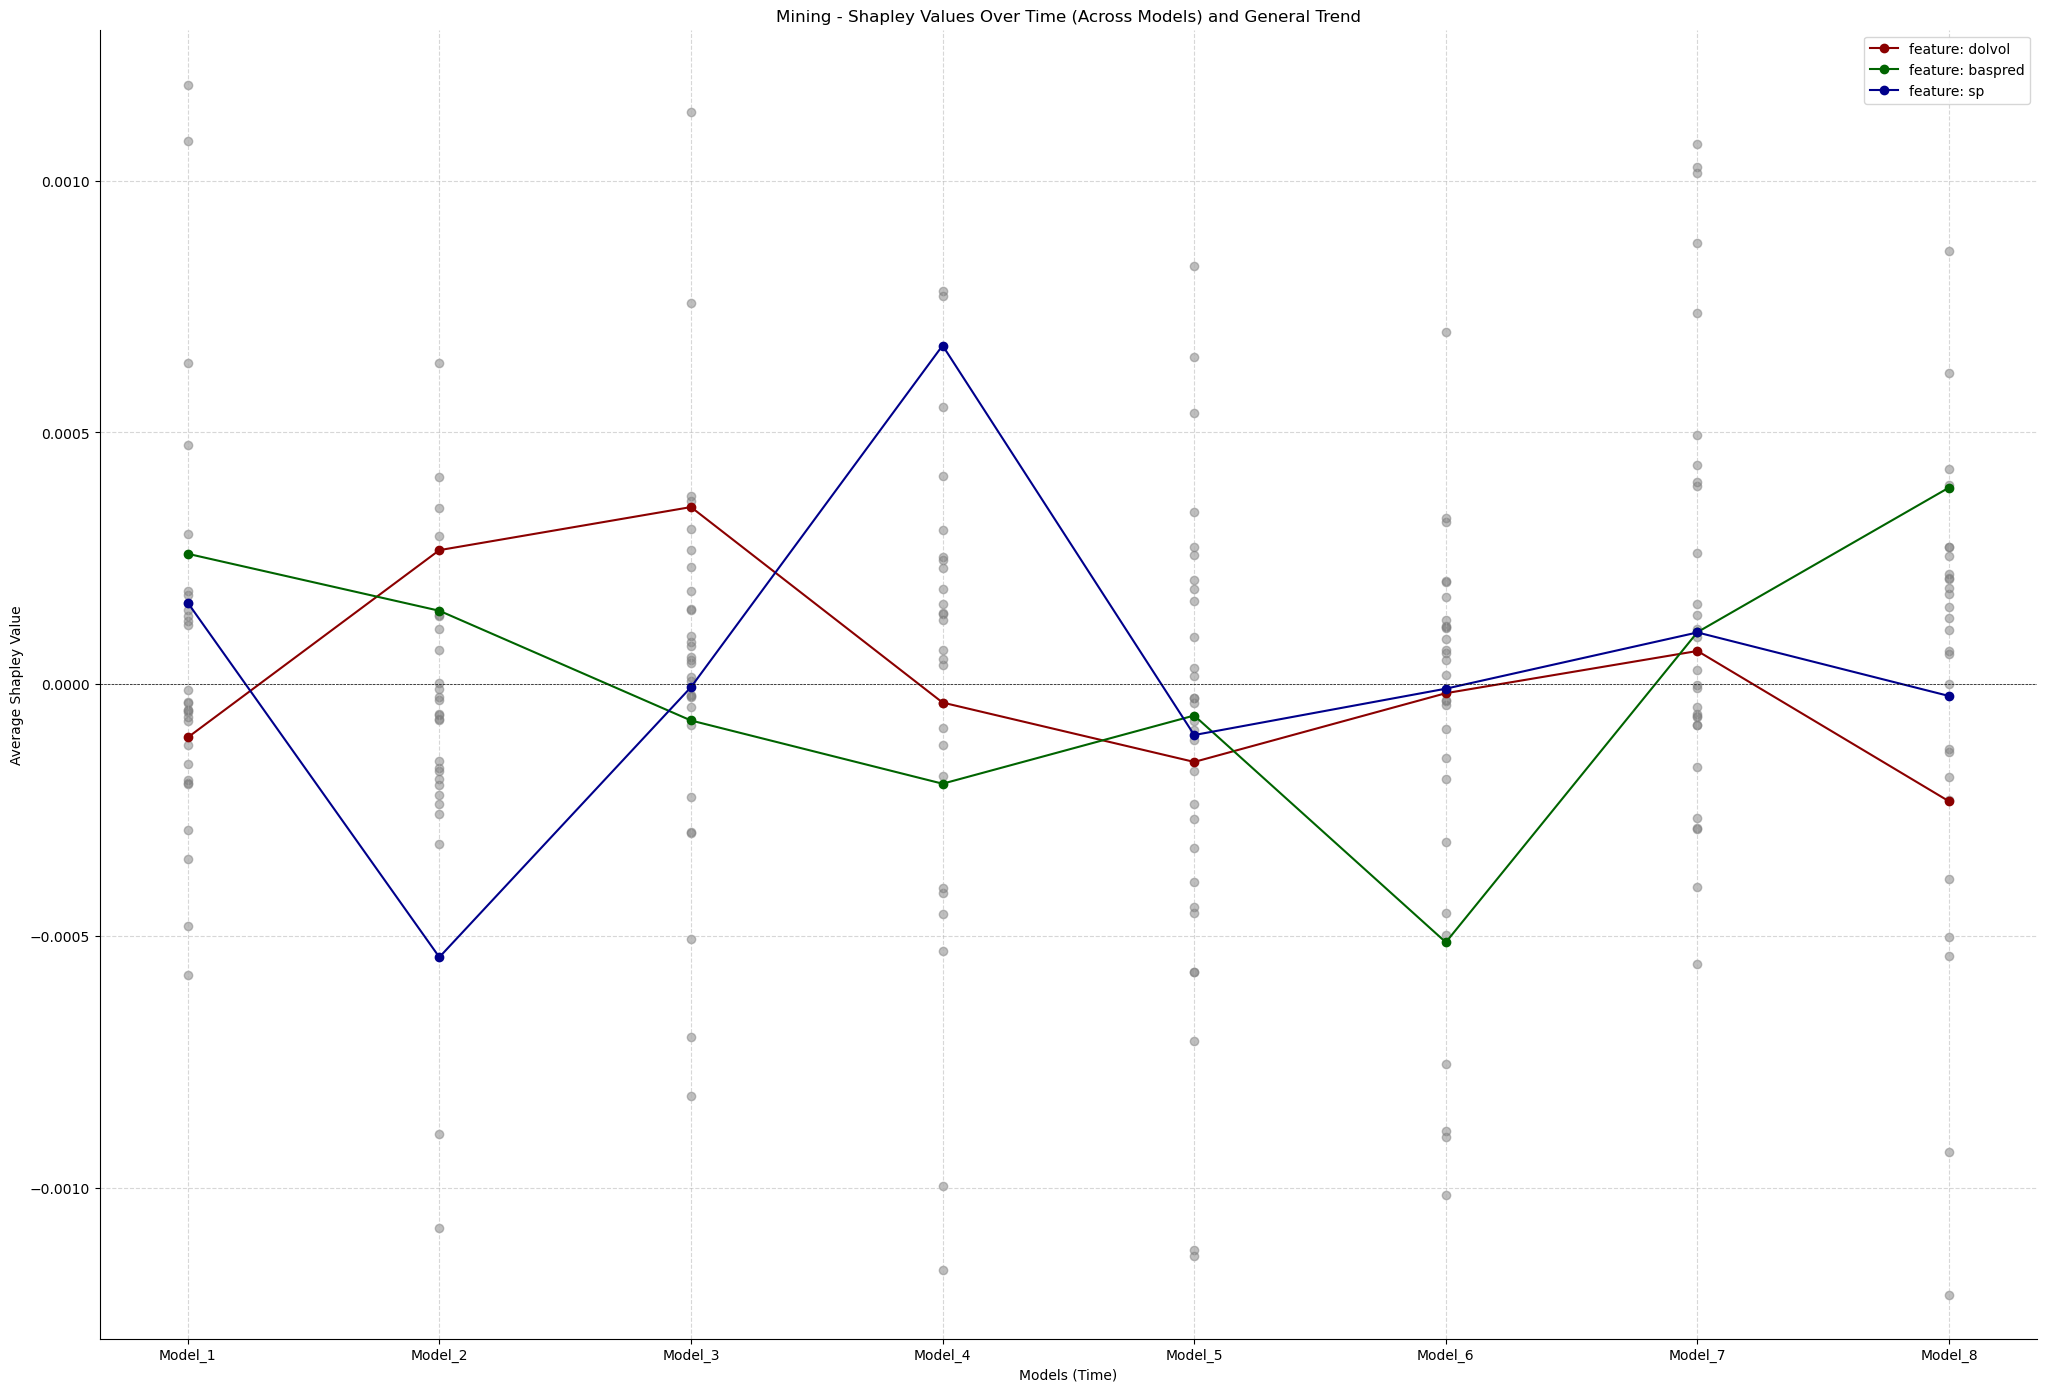

In [167]:
num_models = 8
num_samples = 10
num_features = 3
# num_inds = 9
# inds = ['Agriculture, forestry and fishing','Mining','Construction','Manufacturing',
#         'Transportation and public utilities','Wholesale trade','Retail trade','Finance, insurance and real estate',
#         'Services']

average_shap_values = []

for df in shapley2:
    shap_v = df
    features = shap_v.columns

    average_shap_values.append(shap_v.mean())   # average Shapley


plt.figure(figsize=(25, 17))

# plot individual shapley values
shap_values = np.stack([df.values for df in shapley2])
for feature_index in range(num_features):
    for model_index in range(num_models):
        plt.scatter([model_index] * 10, shap_values[model_index, :, feature_index], alpha=0.5, color='gray')


# plot average Shapley
colors = ['darkred', 'darkgreen', 'darkblue']
for i, feature in enumerate(features):
    # get the average shapley value of each feature and put them into a list
    plt.plot(range(num_models), [avg_shap[i] for avg_shap in average_shap_values], label=feature, marker='o', color = colors[i], linewidth=1.5)


plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    
plt.xlabel('Models (Time)')
plt.ylabel('Average Shapley Value')
plt.title('Mining - Shapley Values Over Time (Across Models) and General Trend')
plt.xticks(range(num_models), [f"Model_{i+1}" for i in range(num_models)])  # Label x-axis with model names
plt.legend()

plt.ylim(-0.0013, 0.0013)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


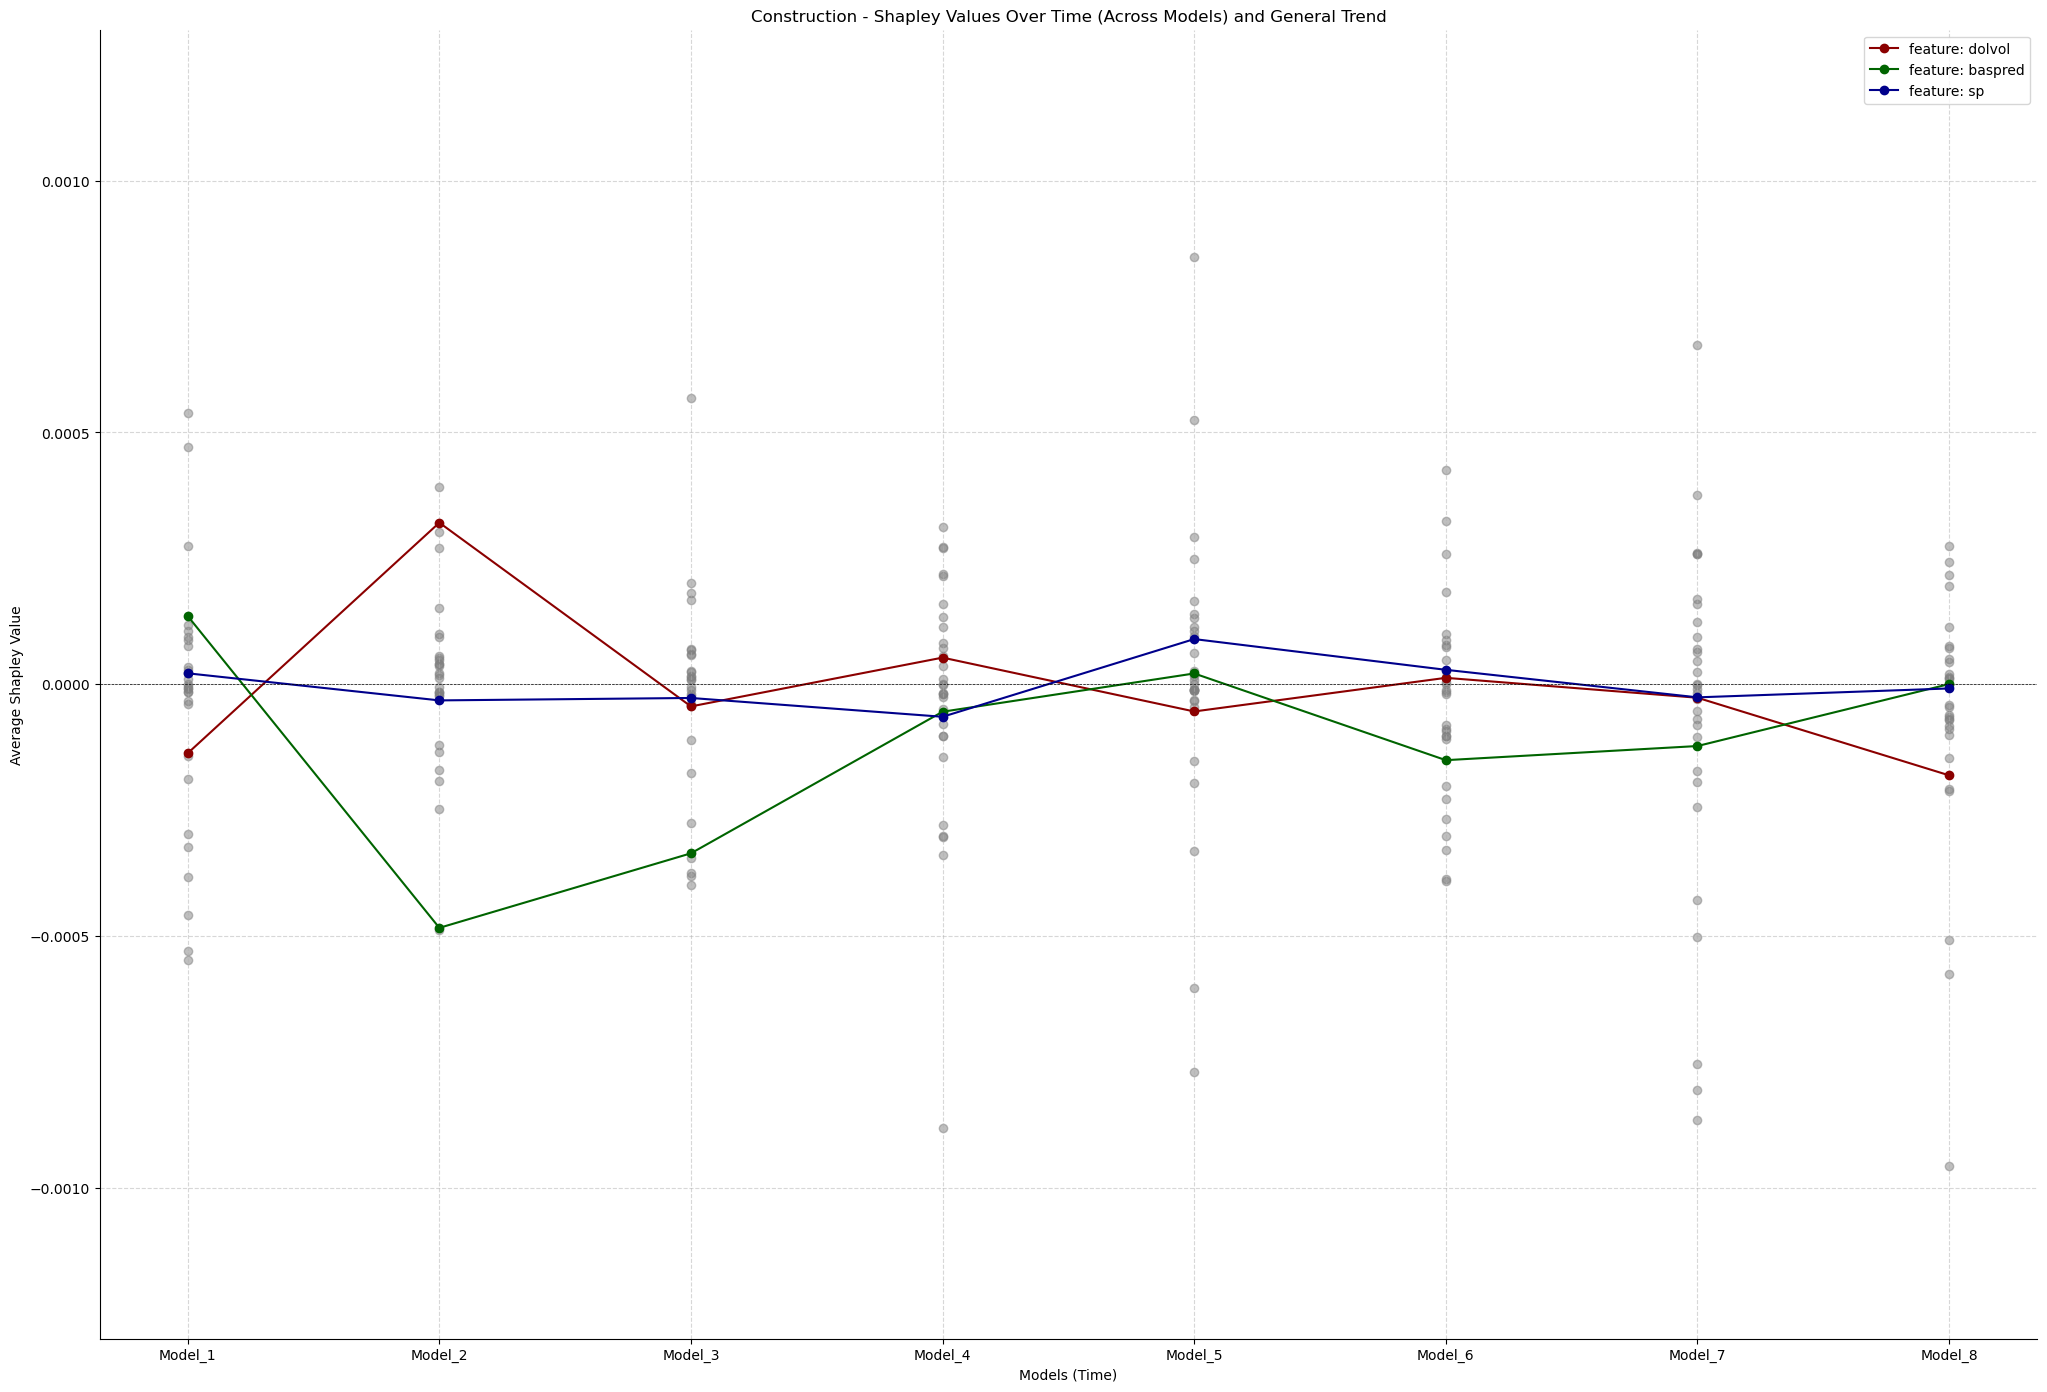

In [168]:
num_models = 8
num_samples = 10
num_features = 3
# num_inds = 9
# inds = ['Agriculture, forestry and fishing','Mining','Construction','Manufacturing',
#         'Transportation and public utilities','Wholesale trade','Retail trade','Finance, insurance and real estate',
#         'Services']

average_shap_values = []

for df in shapley3:
    shap_v = df
    features = shap_v.columns

    average_shap_values.append(shap_v.mean())   # average Shapley


plt.figure(figsize=(25, 17))

# plot individual shapley values
shap_values = np.stack([df.values for df in shapley3])
for feature_index in range(num_features):
    for model_index in range(num_models):
        plt.scatter([model_index] * 10, shap_values[model_index, :, feature_index], alpha=0.5, color='gray')


# plot average Shapley
colors = ['darkred', 'darkgreen', 'darkblue']
for i, feature in enumerate(features):
    # get the average shapley value of each feature and put them into a list
    plt.plot(range(num_models), [avg_shap[i] for avg_shap in average_shap_values], label=feature, marker='o', color = colors[i], linewidth=1.5)


plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    
plt.xlabel('Models (Time)')
plt.ylabel('Average Shapley Value')
plt.title('Construction - Shapley Values Over Time (Across Models) and General Trend')
plt.xticks(range(num_models), [f"Model_{i+1}" for i in range(num_models)])  # Label x-axis with model names
plt.legend()

plt.ylim(-0.0013, 0.0013)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


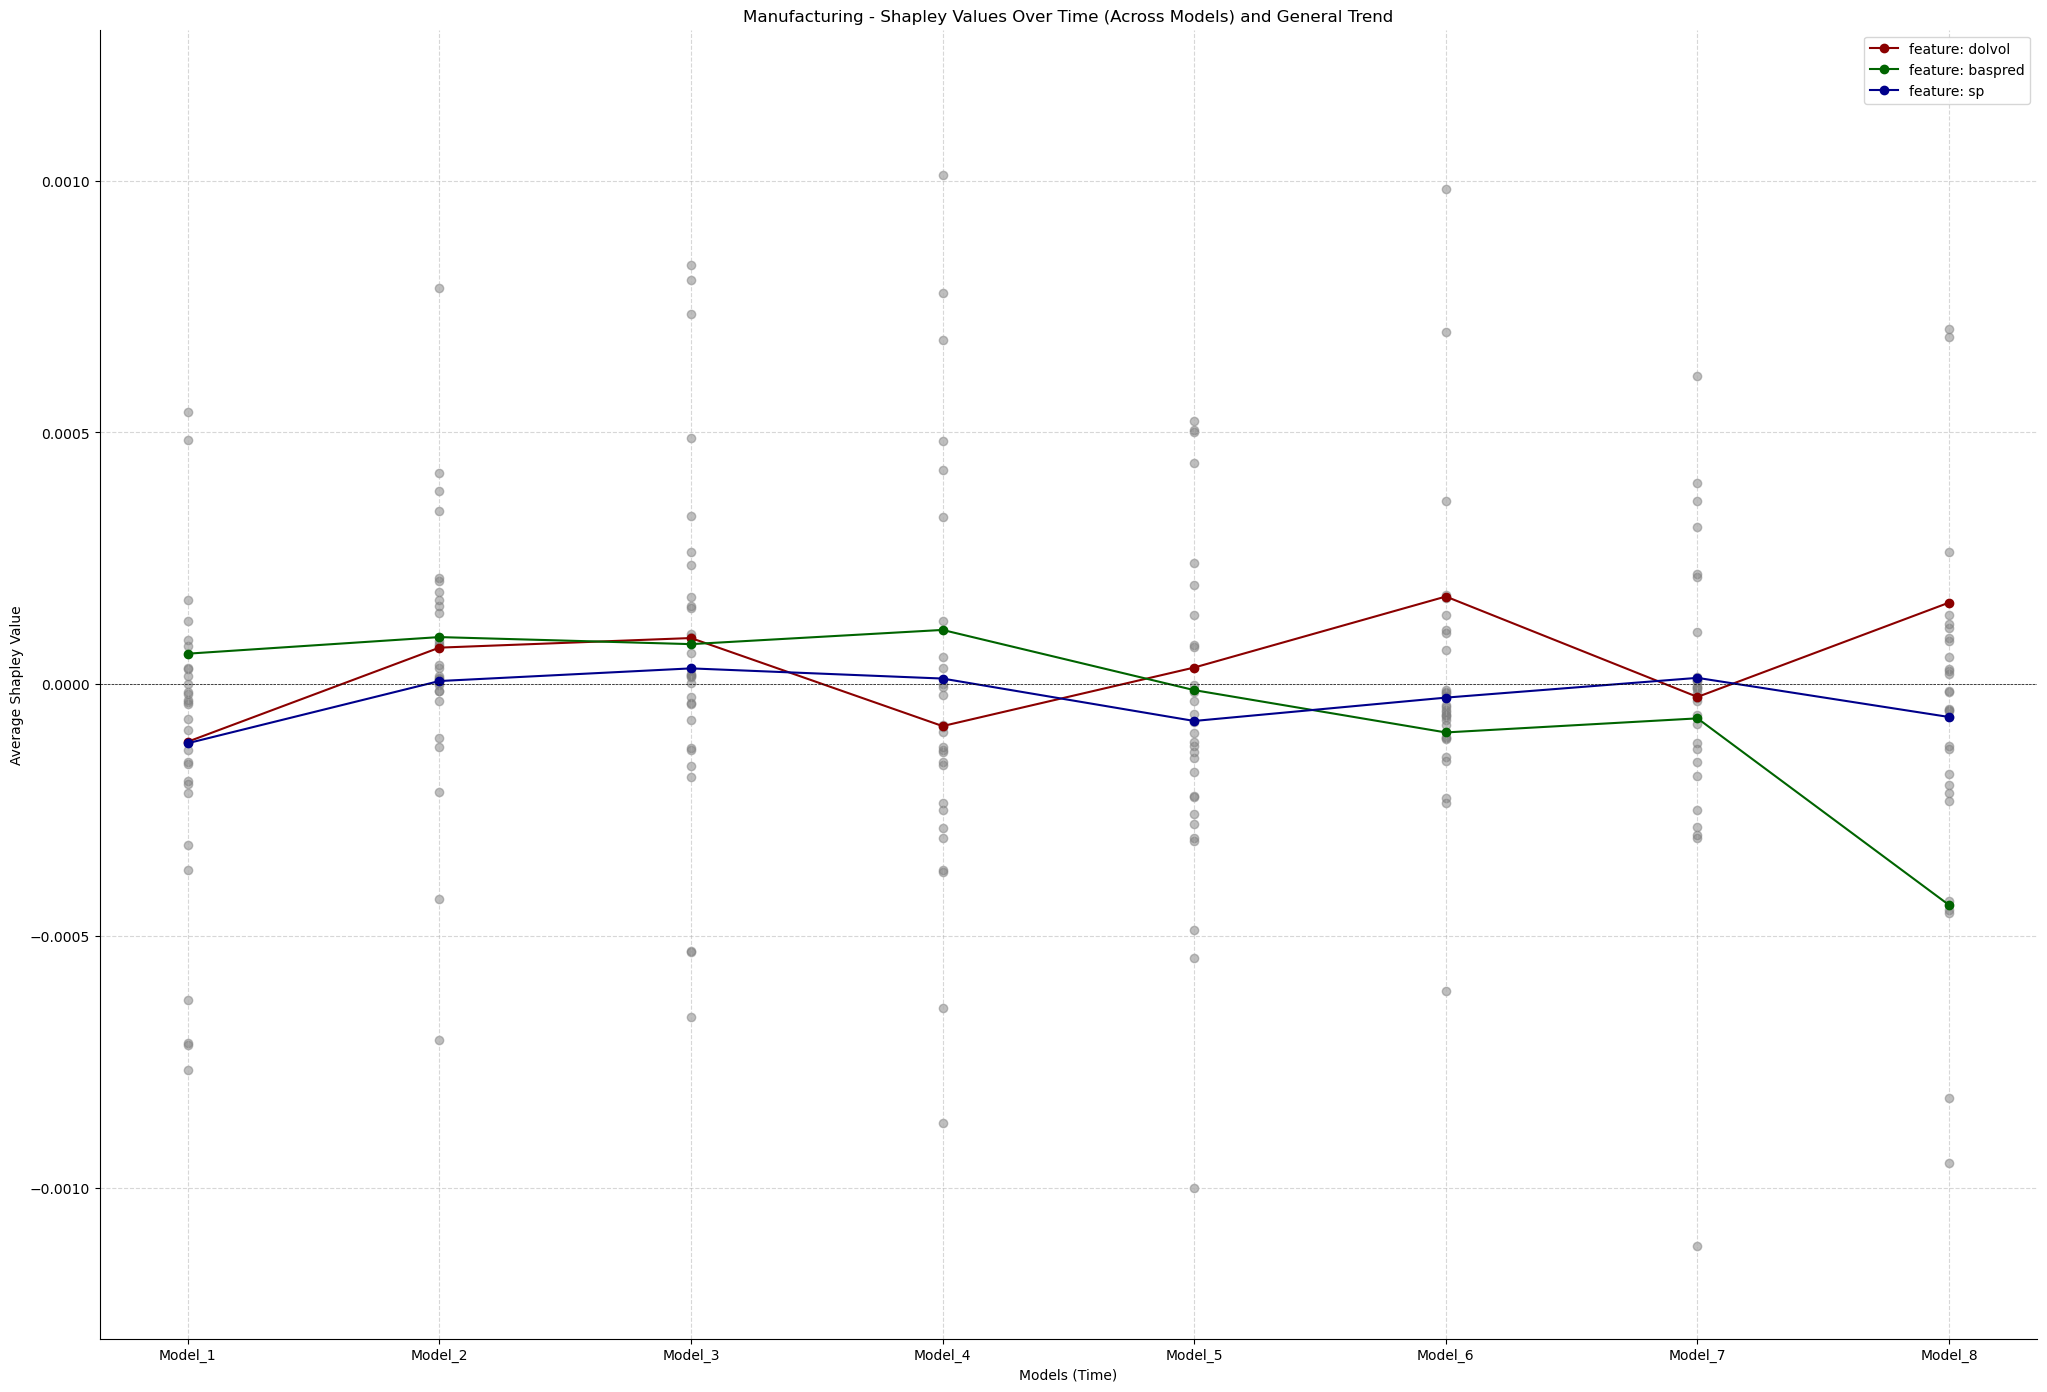

In [169]:
num_models = 8
num_samples = 10
num_features = 3
# num_inds = 9
# inds = ['Agriculture, forestry and fishing','Mining','Construction','Manufacturing',
#         'Transportation and public utilities','Wholesale trade','Retail trade','Finance, insurance and real estate',
#         'Services']

average_shap_values = []

for df in shapley4:
    shap_v = df
    features = shap_v.columns

    average_shap_values.append(shap_v.mean())   # average Shapley


plt.figure(figsize=(25, 17))

# plot individual shapley values
shap_values = np.stack([df.values for df in shapley4])
for feature_index in range(num_features):
    for model_index in range(num_models):
        plt.scatter([model_index] * 10, shap_values[model_index, :, feature_index], alpha=0.5, color='gray')


# plot average Shapley
colors = ['darkred', 'darkgreen', 'darkblue']
for i, feature in enumerate(features):
    # get the average shapley value of each feature and put them into a list
    plt.plot(range(num_models), [avg_shap[i] for avg_shap in average_shap_values], label=feature, marker='o', color = colors[i], linewidth=1.5)


plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    
plt.xlabel('Models (Time)')
plt.ylabel('Average Shapley Value')
plt.title('Manufacturing - Shapley Values Over Time (Across Models) and General Trend')
plt.xticks(range(num_models), [f"Model_{i+1}" for i in range(num_models)])  # Label x-axis with model names
plt.legend()

plt.ylim(-0.0013, 0.0013)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


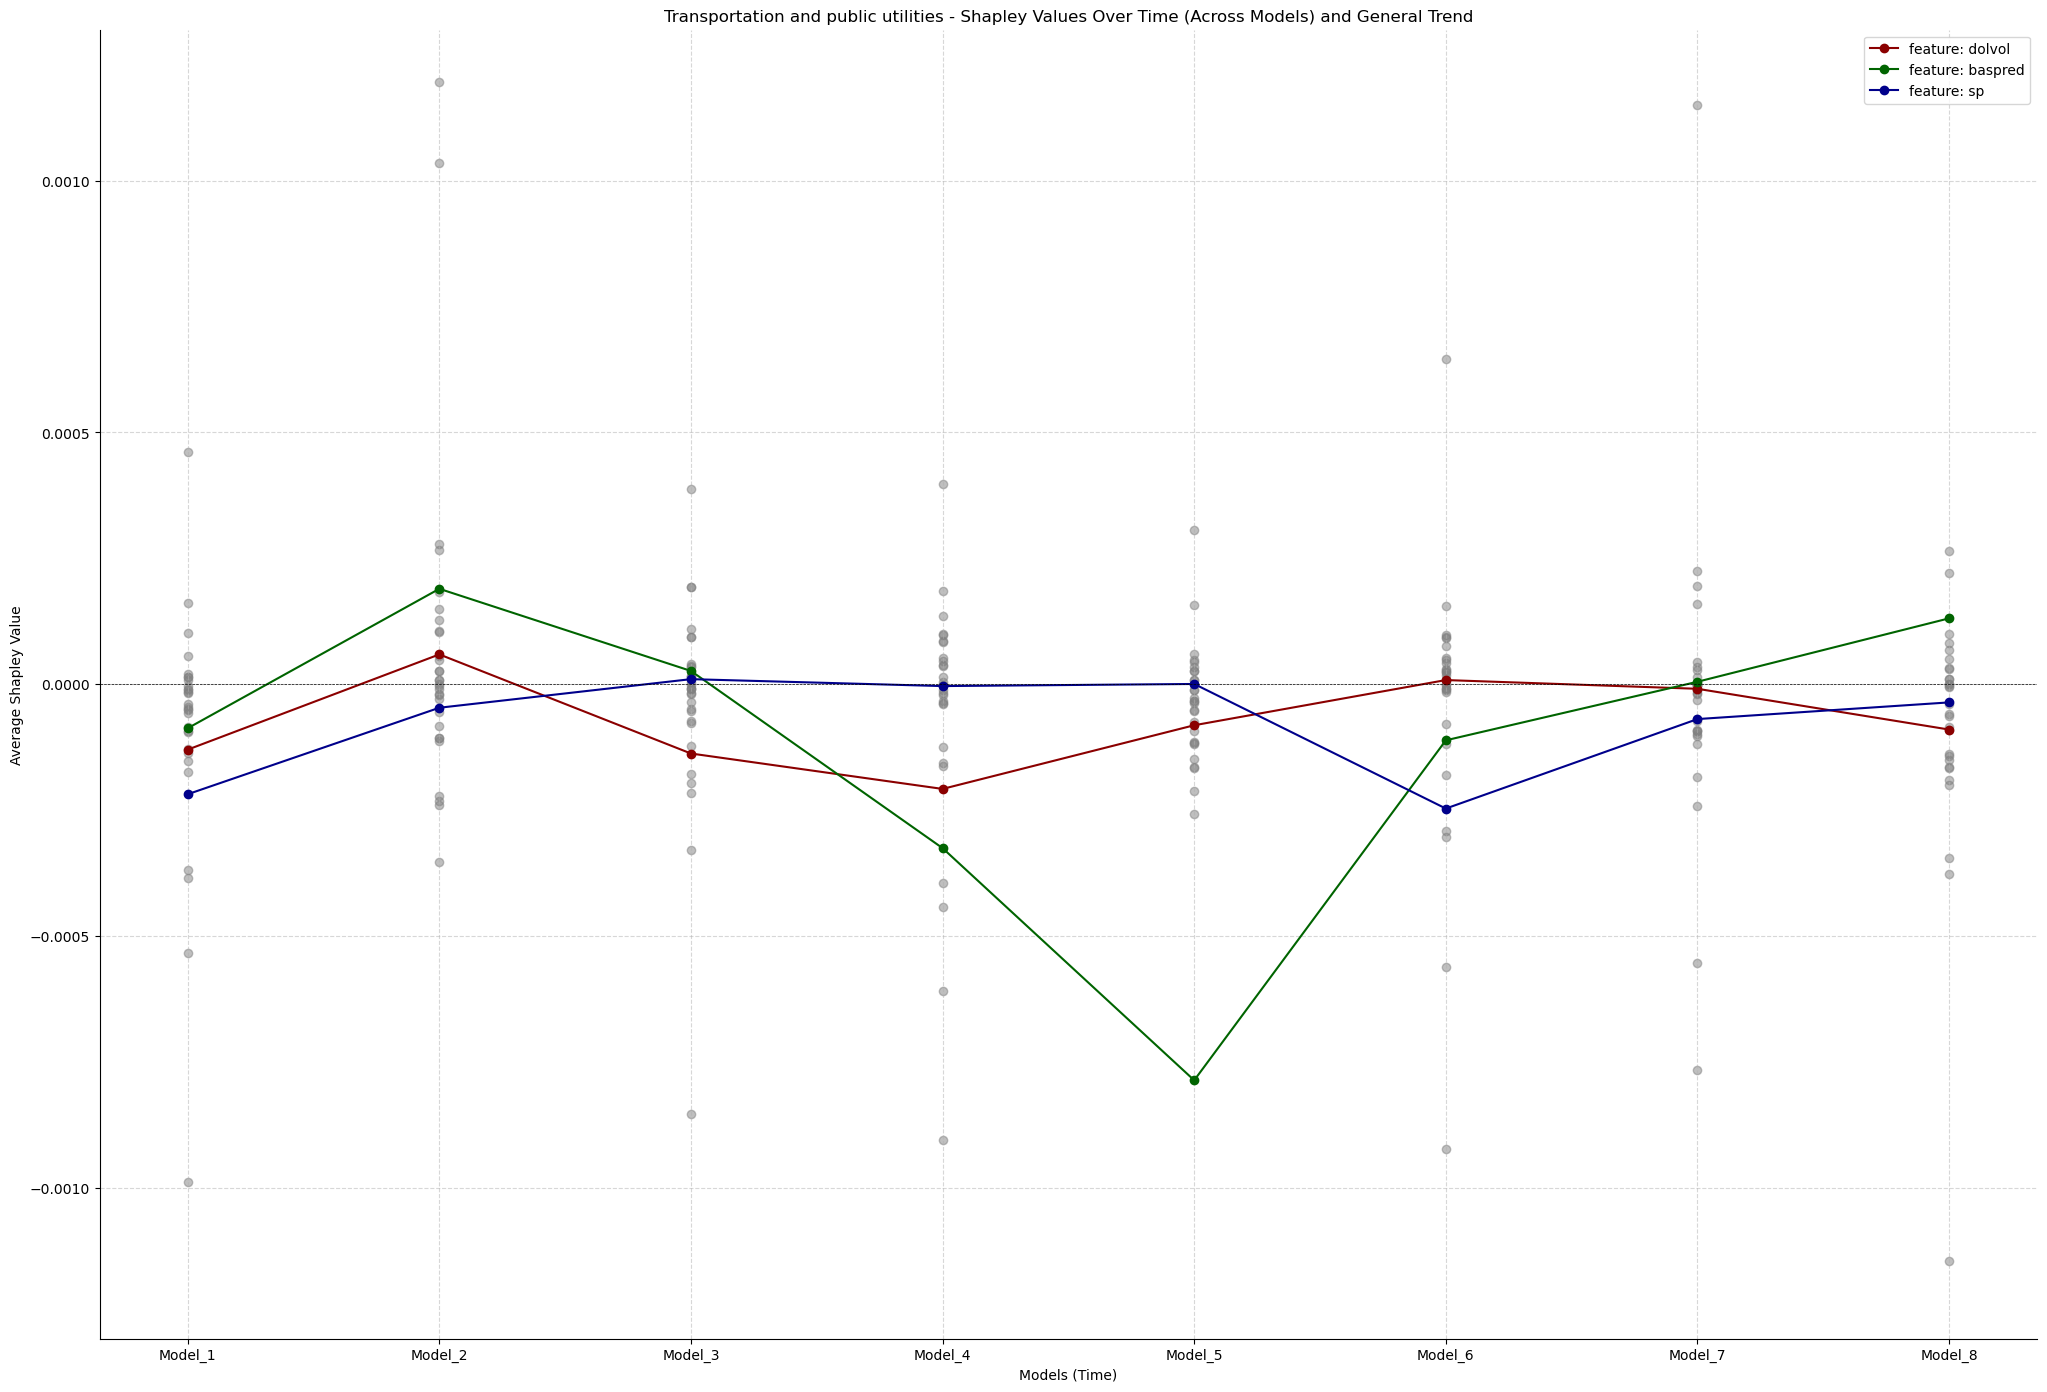

In [170]:
num_models = 8
num_samples = 10
num_features = 3
# num_inds = 9
# inds = ['Agriculture, forestry and fishing','Mining','Construction','Manufacturing',
#         'Transportation and public utilities','Wholesale trade','Retail trade','Finance, insurance and real estate',
#         'Services']

average_shap_values = []

for df in shapley5:
    shap_v = df
    features = shap_v.columns

    average_shap_values.append(shap_v.mean())   # average Shapley


plt.figure(figsize=(25, 17))

# plot individual shapley values
shap_values = np.stack([df.values for df in shapley5])
for feature_index in range(num_features):
    for model_index in range(num_models):
        plt.scatter([model_index] * 10, shap_values[model_index, :, feature_index], alpha=0.5, color='gray')


# plot average Shapley
colors = ['darkred', 'darkgreen', 'darkblue']
for i, feature in enumerate(features):
    # get the average shapley value of each feature and put them into a list
    plt.plot(range(num_models), [avg_shap[i] for avg_shap in average_shap_values], label=feature, marker='o', color = colors[i], linewidth=1.5)


plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    
plt.xlabel('Models (Time)')
plt.ylabel('Average Shapley Value')
plt.title('Transportation and public utilities - Shapley Values Over Time (Across Models) and General Trend')
plt.xticks(range(num_models), [f"Model_{i+1}" for i in range(num_models)])  # Label x-axis with model names
plt.legend()

plt.ylim(-0.0013, 0.0013)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

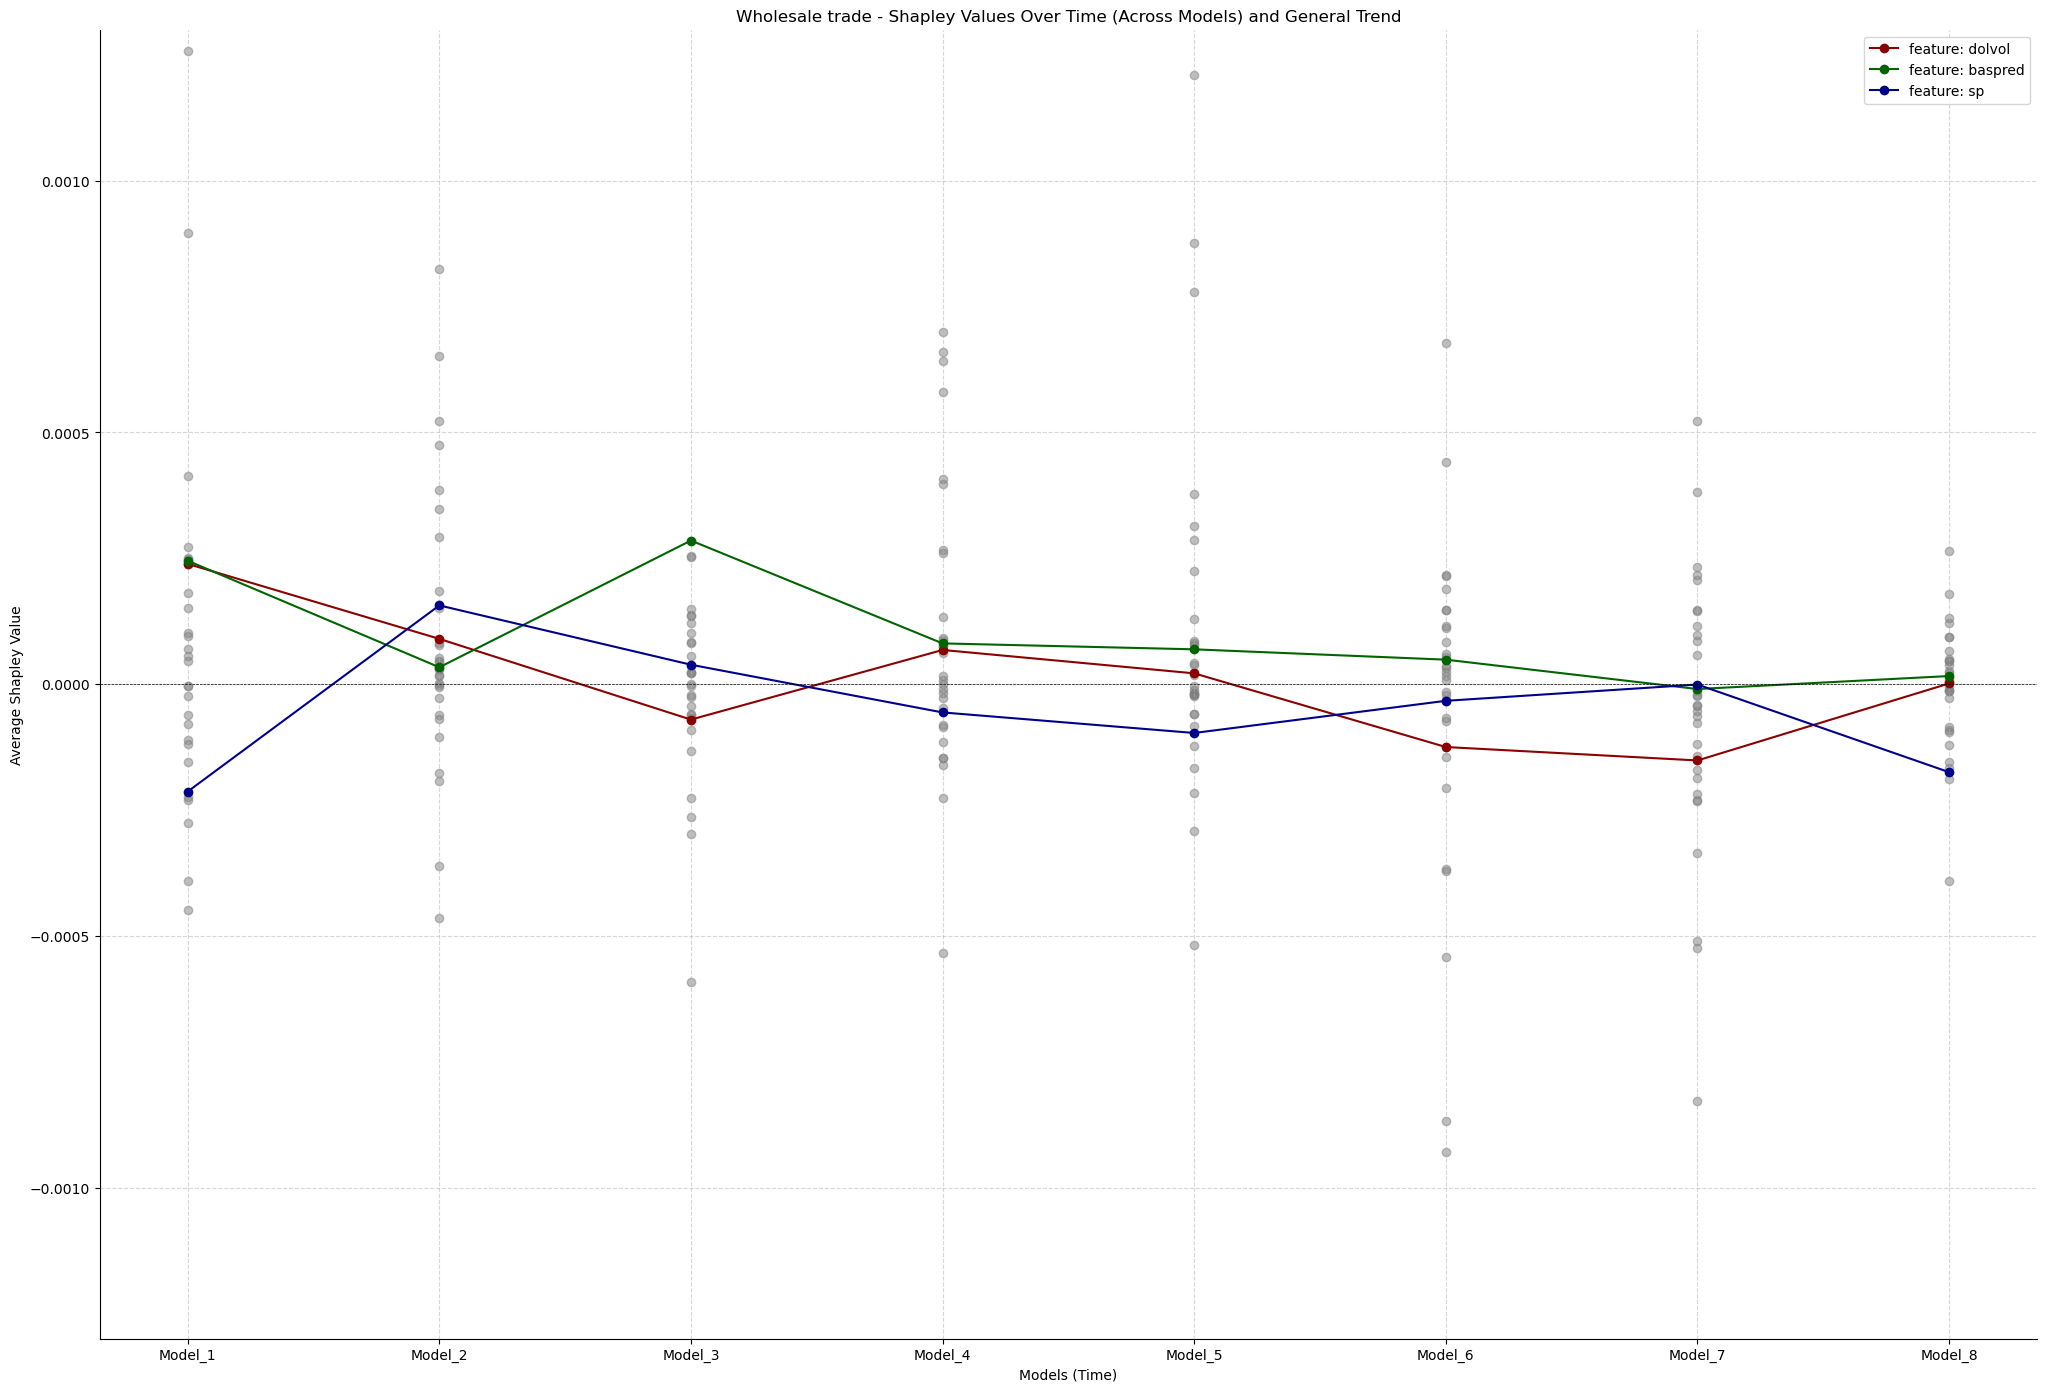

In [171]:
num_models = 8
num_samples = 10
num_features = 3
# num_inds = 9
# inds = ['Agriculture, forestry and fishing','Mining','Construction','Manufacturing',
#         'Transportation and public utilities','Wholesale trade','Retail trade','Finance, insurance and real estate',
#         'Services']

average_shap_values = []

for df in shapley6:
    shap_v = df
    features = shap_v.columns

    average_shap_values.append(shap_v.mean())   # average Shapley


plt.figure(figsize=(25, 17))

# plot individual shapley values
shap_values = np.stack([df.values for df in shapley6])
for feature_index in range(num_features):
    for model_index in range(num_models):
        plt.scatter([model_index] * 10, shap_values[model_index, :, feature_index], alpha=0.5, color='gray')


# plot average Shapley
colors = ['darkred', 'darkgreen', 'darkblue']
for i, feature in enumerate(features):
    # get the average shapley value of each feature and put them into a list
    plt.plot(range(num_models), [avg_shap[i] for avg_shap in average_shap_values], label=feature, marker='o', color = colors[i], linewidth=1.5)


plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    
plt.xlabel('Models (Time)')
plt.ylabel('Average Shapley Value')
plt.title('Wholesale trade - Shapley Values Over Time (Across Models) and General Trend')
plt.xticks(range(num_models), [f"Model_{i+1}" for i in range(num_models)])  # Label x-axis with model names
plt.legend()

plt.ylim(-0.0013, 0.0013)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

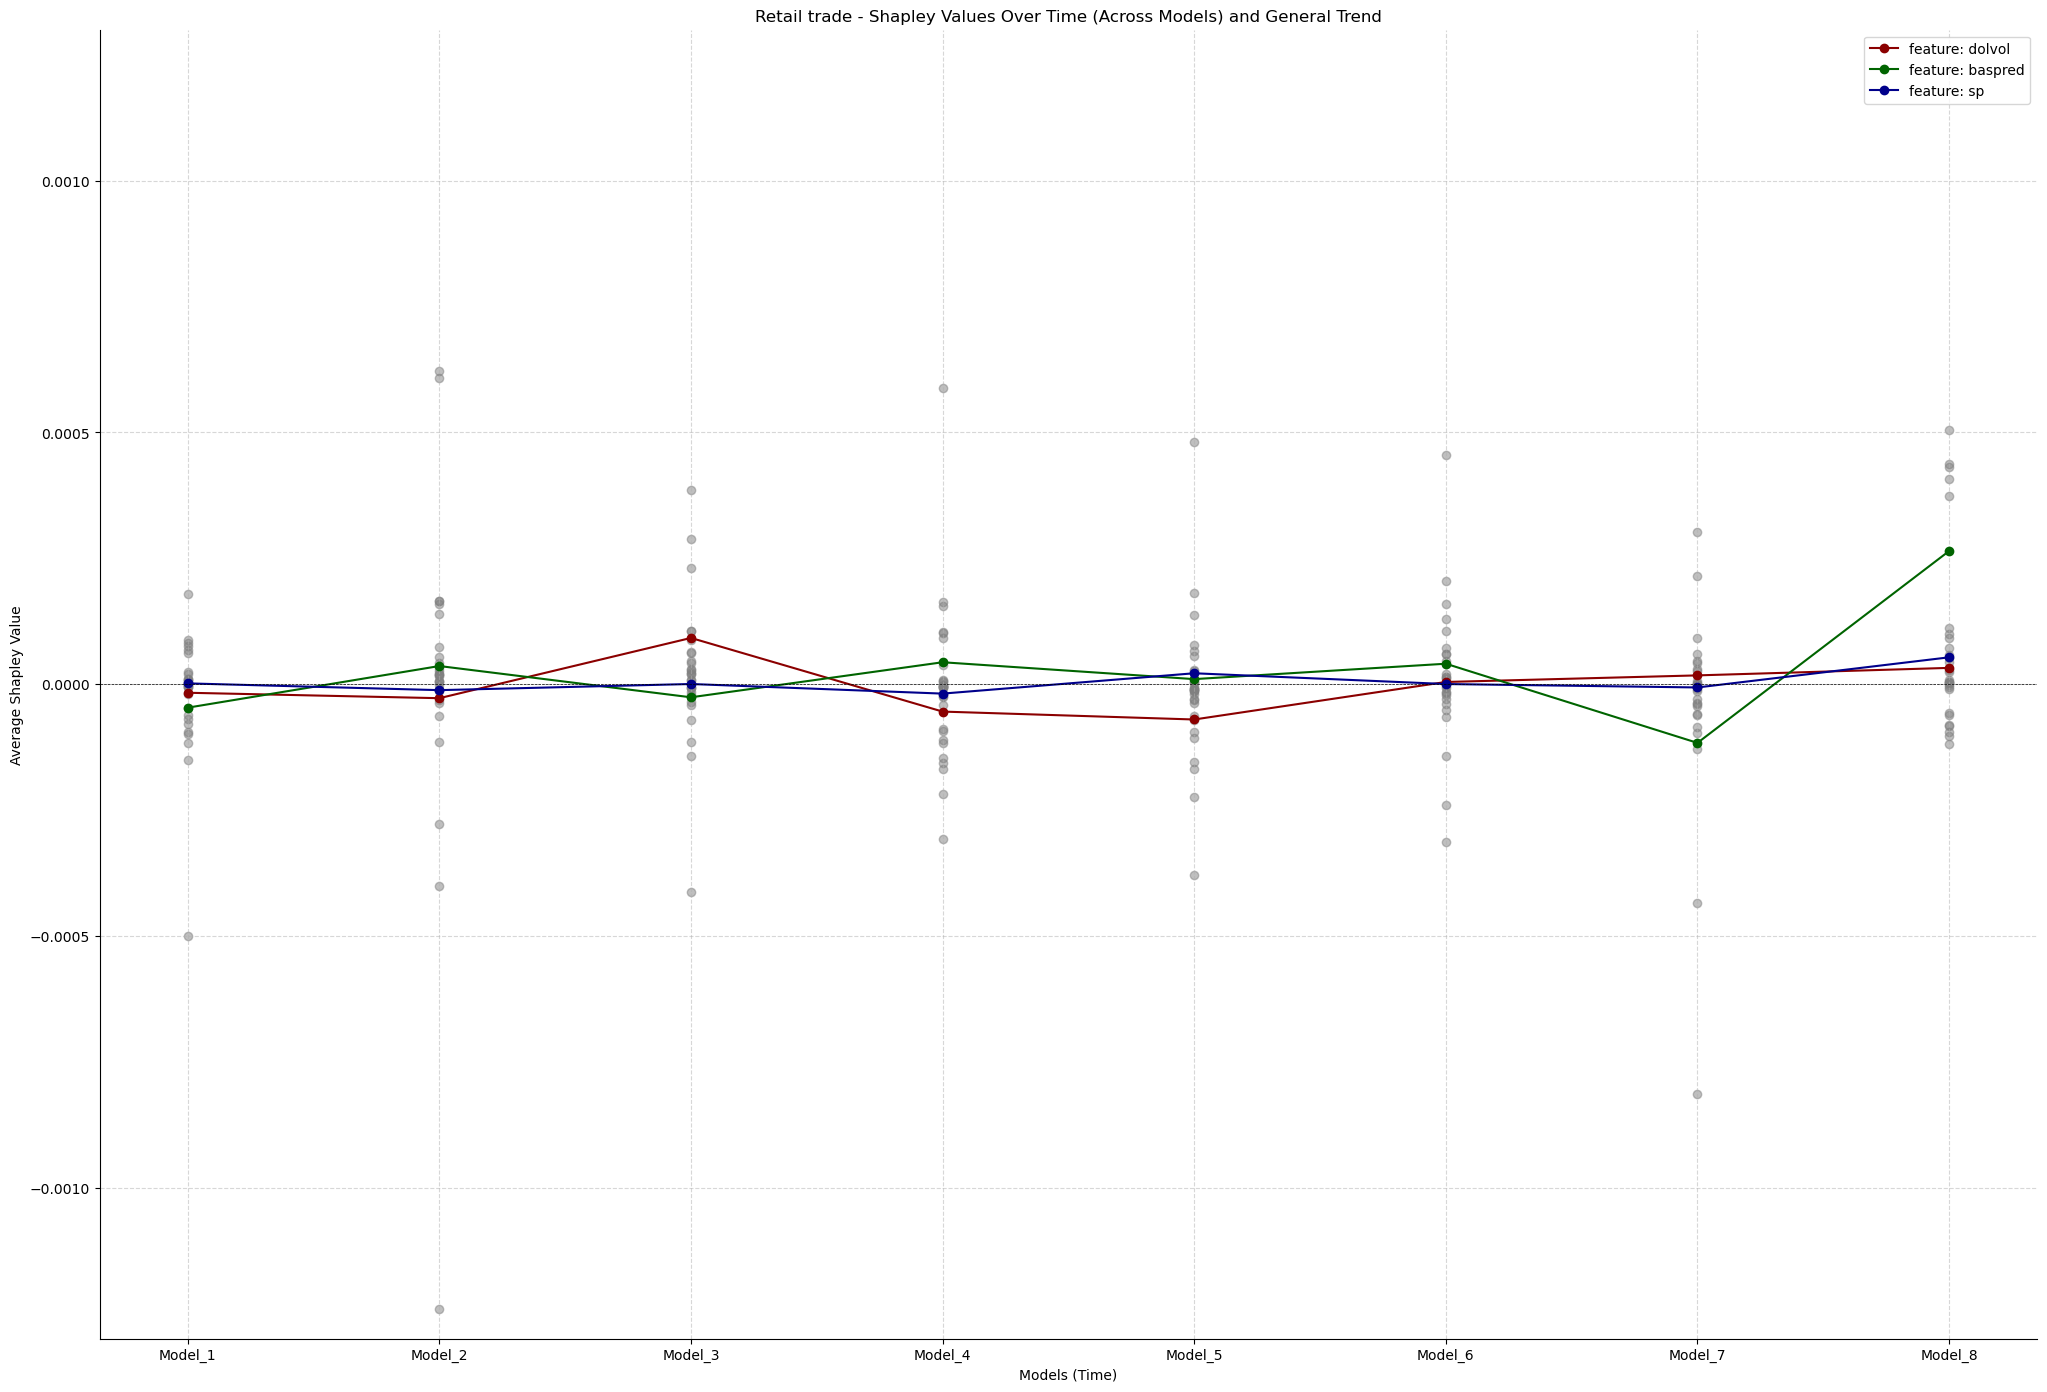

In [172]:
num_models = 8
num_samples = 10
num_features = 3
# num_inds = 9
# inds = ['Agriculture, forestry and fishing','Mining','Construction','Manufacturing',
#         'Transportation and public utilities','Wholesale trade','Retail trade','Finance, insurance and real estate',
#         'Services']

average_shap_values = []

for df in shapley7:
    shap_v = df
    features = shap_v.columns

    average_shap_values.append(shap_v.mean())   # average Shapley


plt.figure(figsize=(25, 17))

# plot individual shapley values
shap_values = np.stack([df.values for df in shapley7])
for feature_index in range(num_features):
    for model_index in range(num_models):
        plt.scatter([model_index] * 10, shap_values[model_index, :, feature_index], alpha=0.5, color='gray')


# plot average Shapley
colors = ['darkred', 'darkgreen', 'darkblue']
for i, feature in enumerate(features):
    # get the average shapley value of each feature and put them into a list
    plt.plot(range(num_models), [avg_shap[i] for avg_shap in average_shap_values], label=feature, marker='o', color = colors[i], linewidth=1.5)


plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    
plt.xlabel('Models (Time)')
plt.ylabel('Average Shapley Value')
plt.title('Retail trade - Shapley Values Over Time (Across Models) and General Trend')
plt.xticks(range(num_models), [f"Model_{i+1}" for i in range(num_models)])  # Label x-axis with model names
plt.legend()

plt.ylim(-0.0013, 0.0013)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

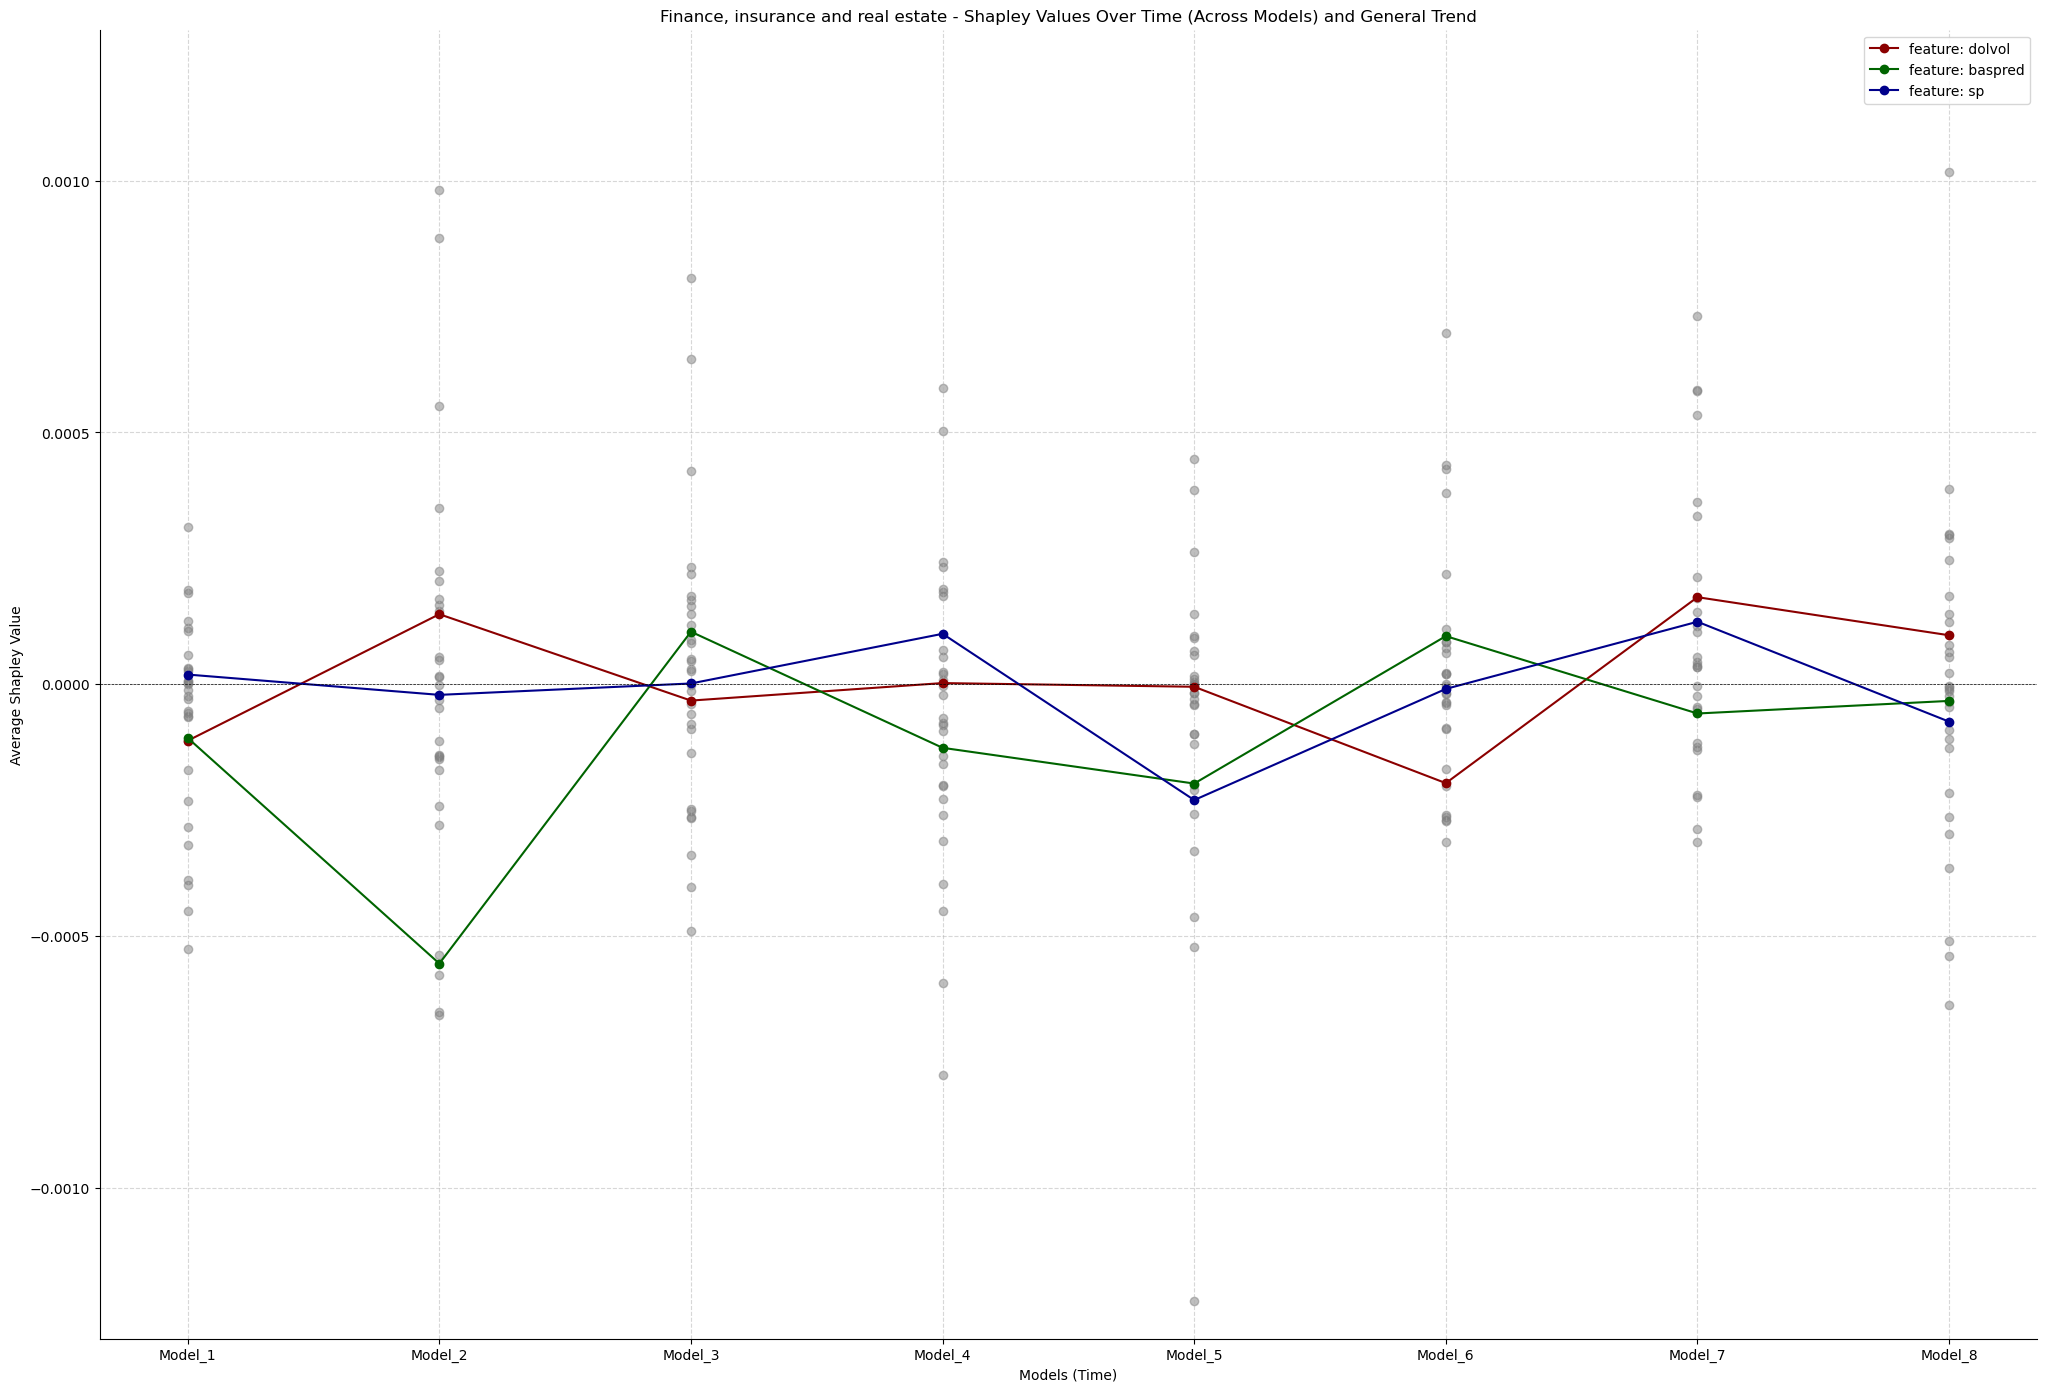

In [173]:
num_models = 8
num_samples = 10
num_features = 3
# num_inds = 9
# inds = ['Agriculture, forestry and fishing','Mining','Construction','Manufacturing',
#         'Transportation and public utilities','Wholesale trade','Retail trade','Finance, insurance and real estate',
#         'Services']

average_shap_values = []

for df in shapley8:
    shap_v = df
    features = shap_v.columns

    average_shap_values.append(shap_v.mean())   # average Shapley


plt.figure(figsize=(25, 17))

# plot individual shapley values
shap_values = np.stack([df.values for df in shapley8])
for feature_index in range(num_features):
    for model_index in range(num_models):
        plt.scatter([model_index] * 10, shap_values[model_index, :, feature_index], alpha=0.5, color='gray')


# plot average Shapley
colors = ['darkred', 'darkgreen', 'darkblue']
for i, feature in enumerate(features):
    # get the average shapley value of each feature and put them into a list
    plt.plot(range(num_models), [avg_shap[i] for avg_shap in average_shap_values], label=feature, marker='o', color = colors[i], linewidth=1.5)


plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    
plt.xlabel('Models (Time)')
plt.ylabel('Average Shapley Value')
plt.title('Finance, insurance and real estate - Shapley Values Over Time (Across Models) and General Trend')
plt.xticks(range(num_models), [f"Model_{i+1}" for i in range(num_models)])  # Label x-axis with model names
plt.legend()

plt.ylim(-0.0013, 0.0013)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

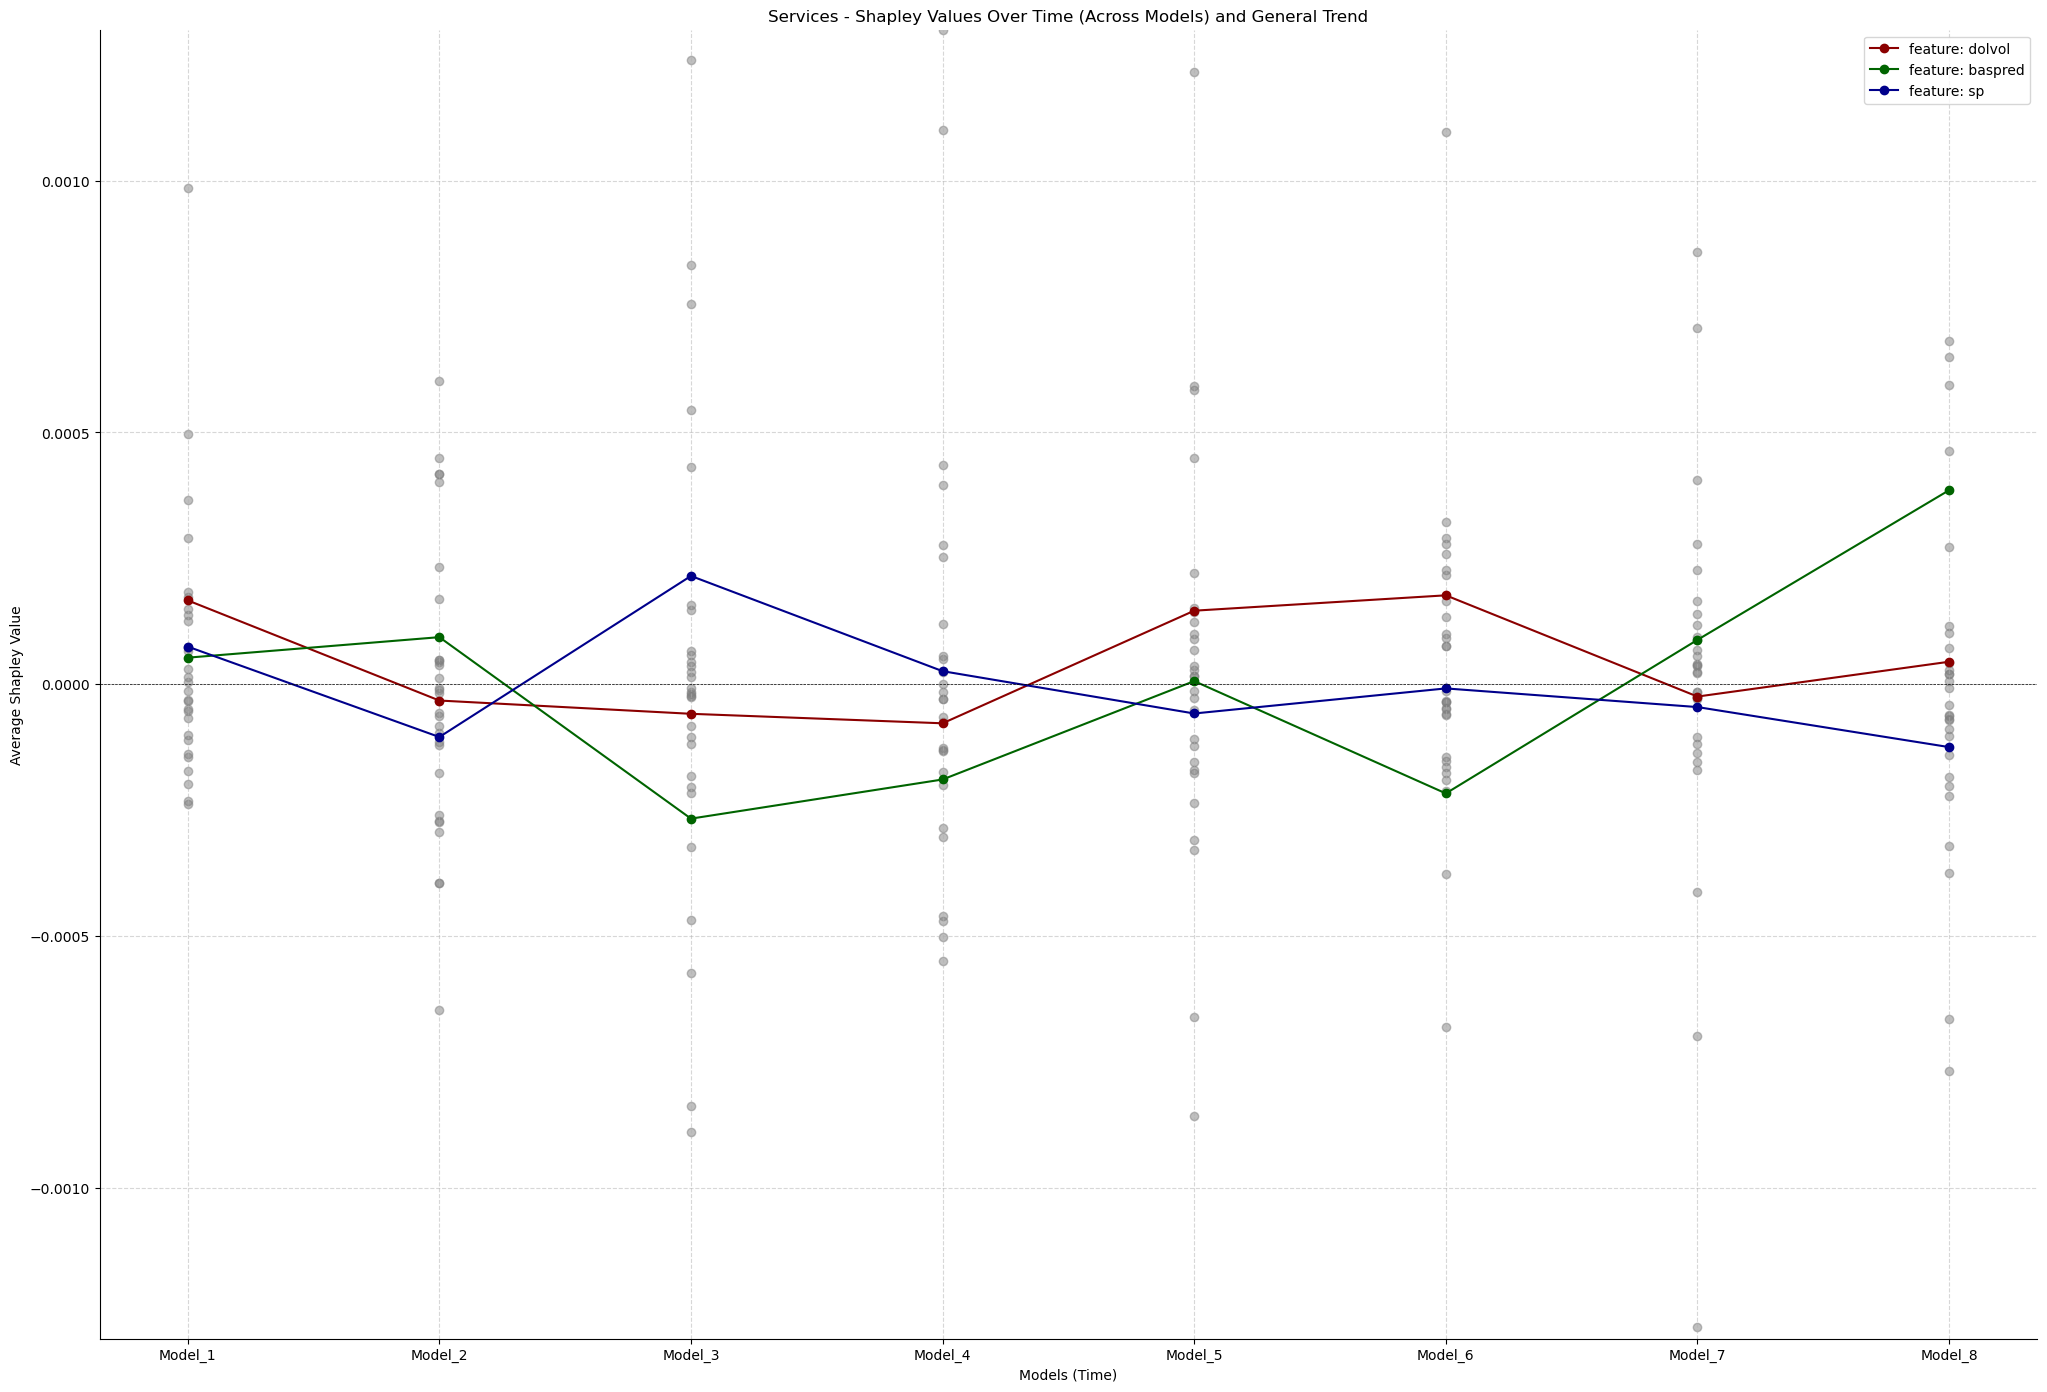

In [174]:
num_models = 8
num_samples = 10
num_features = 3
# num_inds = 9
# inds = ['Agriculture, forestry and fishing','Mining','Construction','Manufacturing',
#         'Transportation and public utilities','Wholesale trade','Retail trade','Finance, insurance and real estate',
#         'Services']

average_shap_values = []

for df in shapley9:
    shap_v = df
    features = shap_v.columns

    average_shap_values.append(shap_v.mean())   # average Shapley


plt.figure(figsize=(25, 17))

# plot individual shapley values
shap_values = np.stack([df.values for df in shapley9])
for feature_index in range(num_features):
    for model_index in range(num_models):
        plt.scatter([model_index] * 10, shap_values[model_index, :, feature_index], alpha=0.5, color='gray')


# plot average Shapley
colors = ['darkred', 'darkgreen', 'darkblue']
for i, feature in enumerate(features):
    # get the average shapley value of each feature and put them into a list
    plt.plot(range(num_models), [avg_shap[i] for avg_shap in average_shap_values], label=feature, marker='o', color = colors[i], linewidth=1.5)


plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    
plt.xlabel('Models (Time)')
plt.ylabel('Average Shapley Value')
plt.title('Services - Shapley Values Over Time (Across Models) and General Trend')
plt.xticks(range(num_models), [f"Model_{i+1}" for i in range(num_models)])  # Label x-axis with model names
plt.legend()

plt.ylim(-0.0013, 0.0013)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()